In [1]:
import re
from PyPDF2 import PdfReader
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
from stop_words import get_stop_words #The words we want to ignore


In [2]:
# Read PDF
reader = PdfReader("source_pdf/PND_2025.pdf")
# Extract text from pdf
text = ""
i = 0
for page in reader.pages:
    text += page.extract_text()

In [3]:
# Clean text (remove special characters)
# Limpiar texto (eliminar caracteres especiales)
cleaned_text = re.sub(r'[^a-zA-ZáéíóúüñÁÉÍÓÚÜÑ\s]', '', text)
cleaned_text = cleaned_text.lower()  # Pasamos a minúsculas
words = cleaned_text.split()


In [4]:
# Filter words that are not in the stopwords list


stop_words_es = get_stop_words('es') #Spanish StopWords
stopwords = ["entre","uso","país","méxico","sus","más","hacia","sobre","sector","manera","mexico","país","lo","como","no","nos","si","e","así","asi","2030","al",
             "nacional","agenda","y", "la", "el", "los", "en", "de", "del", "por", "para","con", "que","a", "las", "para", "es", "un", "una", "que", "se", 
             "su","también","asimismo","mediante", "este", "ha", "será", "través", "además", "son", "o", "esto", "habrá", "mayor", "desde", "ya",
             "sin", "cada", "ello", "debe","muy","nadie","esta","donde","-","federal","mil","han","fue","ción","hasta","ser","ese","esa","sino","ante","está","ni",
             "les","cuales","re","sido",".",",",";", "=",".,","base","porcentaje","línea","….","t"]
filtered_words = [word for word in words if word not in stopwords]
word_counts=Counter(filtered_words)


In [5]:
def search_words_parameters(all_words, top_ten=None, combination=None):
    """
    Busca ocurrencias de palabras (simples o compuestas) en una lista de palabras.
    
    Parámetros:
    - all_words: Lista de palabras filtradas (sin stopwords).
    - top_ten: Número entero opcional que indica cuántas palabras más frecuentes retornar.
    - combination: Lista opcional de palabras o frases (pueden ser compuestas) a buscar.

    Retorna:
    - Un diccionario con las palabras/frases encontradas y su número de repeticiones.
    """
    resultados = {}
    joined_text = ' '.join(all_words)

    if combination:
        for phrase in combination:
            normalized_phrase = re.sub(r'\s+', ' ', phrase.lower().strip())
            pattern = r'\b' + re.escape(normalized_phrase) + r'\b'
            count = len(re.findall(pattern, joined_text))
            resultados[normalized_phrase] = count
        return resultados

    else:
        # Tokenizamos el texto una vez correctamente
        tokenized = re.findall(r'\b[a-záéíóúüñ]+\b', joined_text)
        word_freq = Counter(tokenized)

        if top_ten:
            return dict(word_freq.most_common(top_ten))
        return dict(word_freq)

#### Result on the Word Cloud

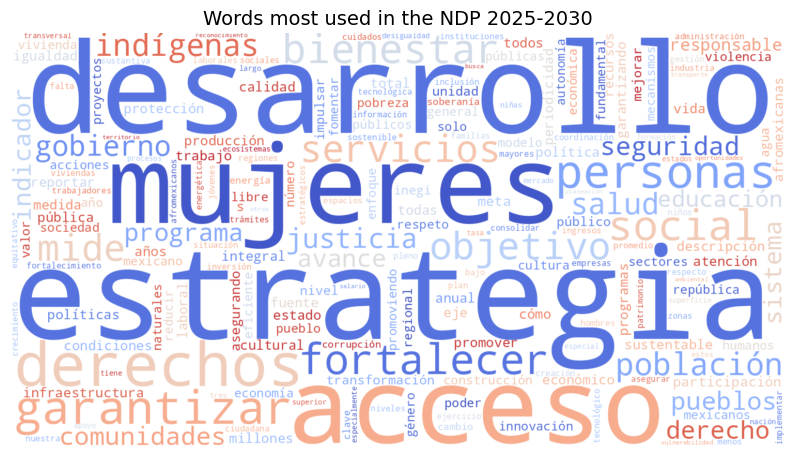

In [6]:
# Count the frequency of each word word_counts
count_words_total = search_words_parameters(filtered_words)
#save filtered words en un csv
df = pd.DataFrame(count_words_total.items(), columns=['word_2025', 'count'])
df.to_csv('results/filtered_words_Sheinbaum.csv', index=False)

wordcloud = WordCloud(
    width=1500, height=800, 
    background_color="white", 
    colormap="coolwarm", 
    random_state=42
).generate_from_frequencies(count_words_total)

# Generate the graph
plt.figure(figsize=(10, 20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Words most used in the NDP 2025-2030", fontsize=14)
plt.show()

#### The 20 most mentioned words in the NDP 2025-2030

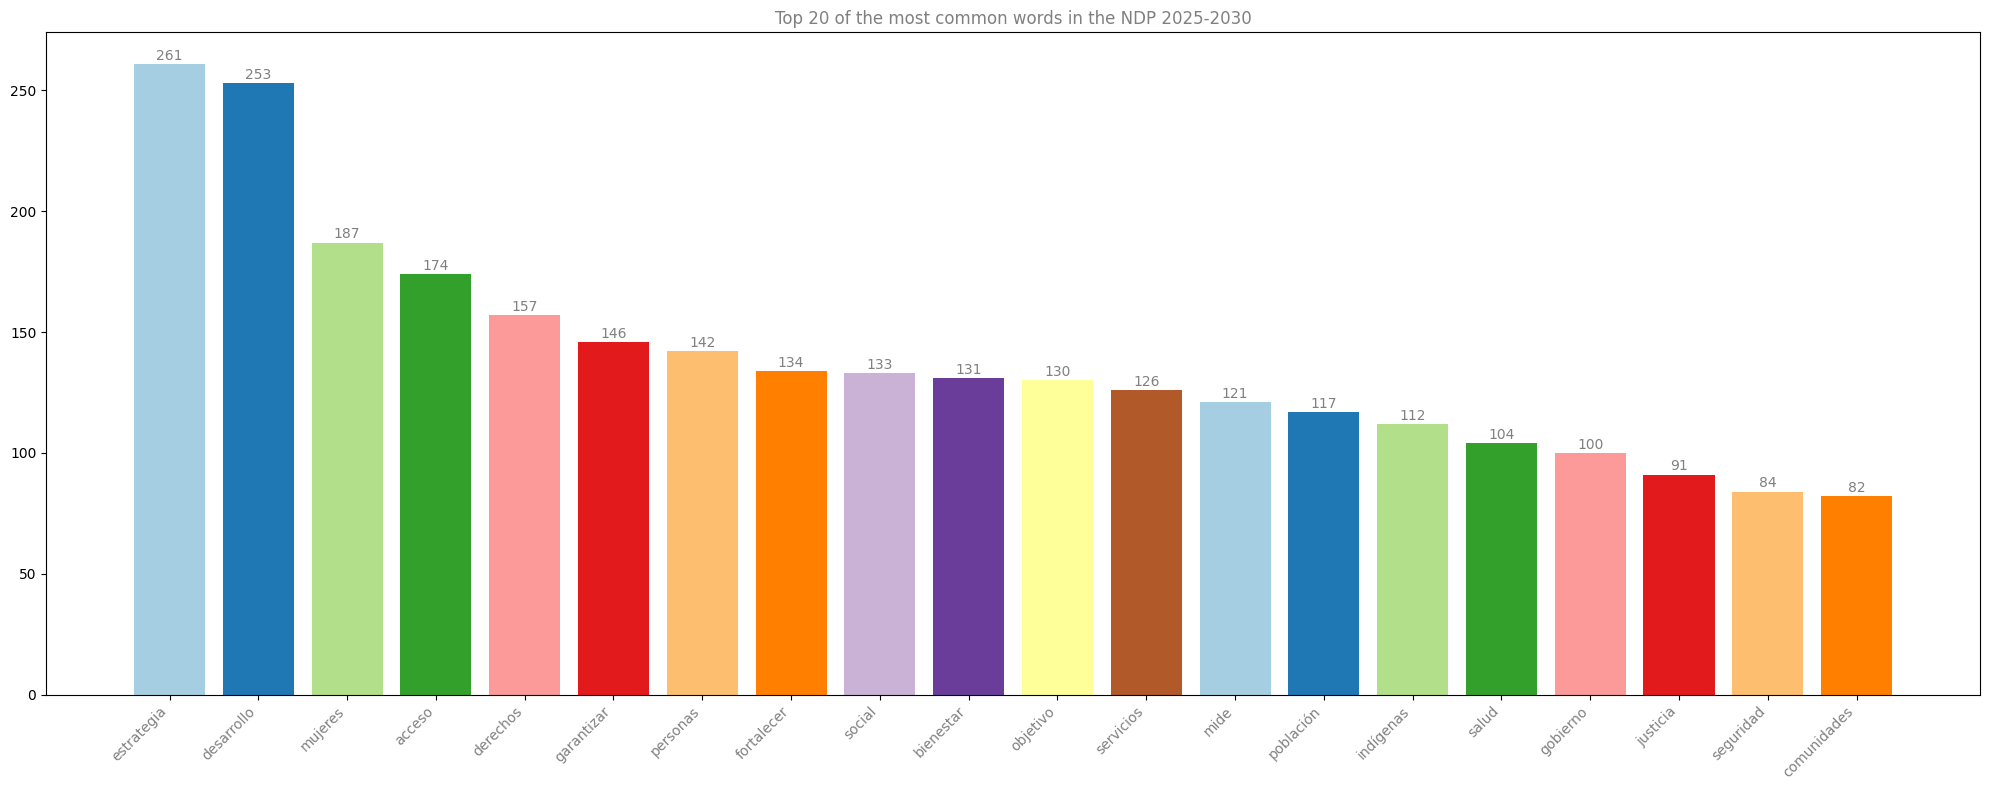

In [7]:
filter_pnd = search_words_parameters(filtered_words, top_ten=20)

# Extract keys and values from the dictionary
x_labels = list(filter_pnd.keys())
y_values = list(filter_pnd.values())


# Generate the graph
plt.figure(figsize=(20, 8))
bars = plt.bar(x_labels, y_values, color=plt.cm.Paired.colors)

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, str(yval), 
             ha='center', va='bottom', fontsize=10, color='gray')
    
plt.title('Top 20 of the most common words in the NDP 2025-2030', fontsize=12,color='gray')
plt.xticks(rotation=45, ha='right', fontsize=10, color='gray')
plt.tight_layout()
plt.show()

### Analysis of words of importance for a democratic state

In [8]:
# Practice case
# Palabras claves de una república democrática según el Art. 40 de la Constitución Mexicana  y Principales referentes internacionales para buenas prácticas de planeación nacional
# OCDE / ONU / ODS / CEPAL / FMI / Banco Mundial / PNUD / IDEA / UNESCO / COP

better_practices = ['sostenibilidad','transparencia','cambio climático','indicador','energías limpias','justicia',
                            'derechos humanos','crecimiento económico','tecnología','innovación','equidad','inclusivo','participación','inclusión','resiliencia','educación','desigualdad',
                            'gobernanza','crecimiento', 'salud']
result_best_practices = search_words_parameters(filtered_words, combination=better_practices)

#### Words of relevance and their repetition within the NDP 2025-2030 

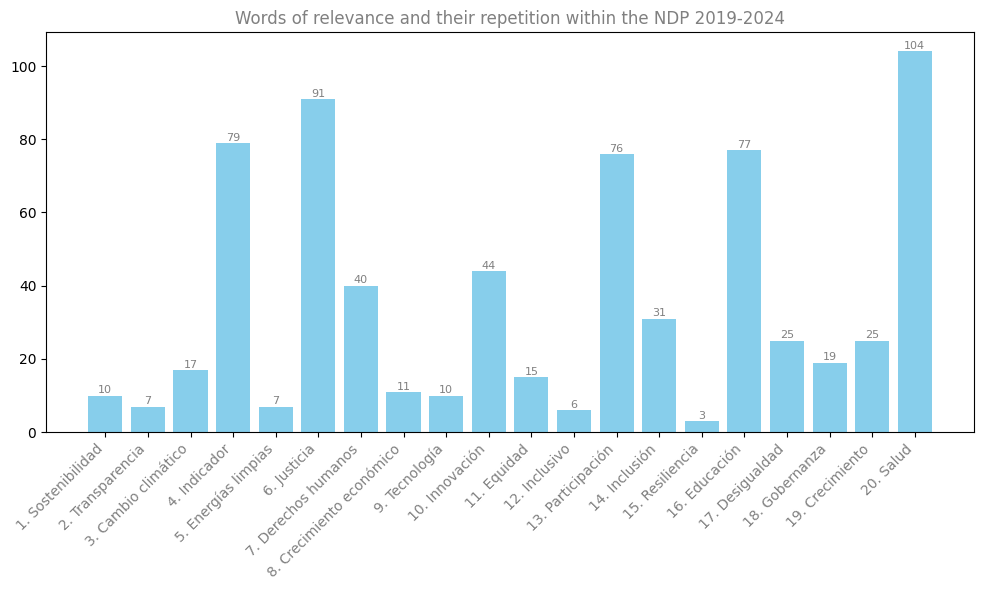

In [9]:
#extract keys and values ​​from dictionary
keys = list(result_best_practices.keys())
values = list(result_best_practices.values())

# Create a new list with consecutive numbers at the beginning and the first letter capitalized
keys2 = [f"{idx}. {item.capitalize()}" for idx, item in enumerate(keys, 1)]


# generate the graph
plt.figure(figsize=(10, 6)) 
bars = plt.bar(keys2, values, color='skyblue')

plt.title('Words of relevance and their repetition within the NDP 2019-2024', fontsize=12,color='gray')
plt.xlabel('', fontsize=14)
plt.ylabel('', fontsize=12, color='gray')

# Rotate x-axis labels so they don't overlap
plt.xticks(rotation=45, ha='right', fontsize=10, color='gray')

# includes rep labels on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, str(yval), 
             ha='center', va='bottom', fontsize=8, color ='gray')
    
# Adjust the spacing so that the labels do not get cut off
plt.tight_layout()
plt.show()

#### Summary

In [10]:
formatted_number = f"{len(filtered_words):,}"

print('Total words analyzed from the NDP 2025-2030 (in PDF format): ',formatted_number)

Total words analyzed from the NDP 2025-2030 (in PDF format):  25,119


In [11]:
def convert_dicc_to_df(dicc_gral, colum_desc, colum_count):
    """
    Converts a dictionary to a pandas DataFrame, formats the columns and adds a numeric index.

    Args:
        dictionary: The dictionary to convert.
        column_name: The name of the column for the dictionary keys.
        new_column_name: The name of the new column with the desired format.

    Returns:
        A Pandas DataFrame with the columns formatted.
    """

    df = pd.DataFrame({colum_desc: dicc_gral.keys(), colum_count: dicc_gral.values()})
    df['Nummber'] = df.index + 1
    df[colum_desc] = df['Nummber'].astype(str) + '. ' + df[colum_desc].str.title()
    df = df.drop('Nummber', axis=1)
    # order by values
    df = df.sort_values(by=colum_count, ascending=False)
    
    return df

In [12]:
#convert dictionary collection to pandas dataframe
df_most_commun = convert_dicc_to_df(filter_pnd, 'Sheinbaum Words', 'Count')
df_desire = convert_dicc_to_df(result_best_practices, 'Desired Words', 'Count')

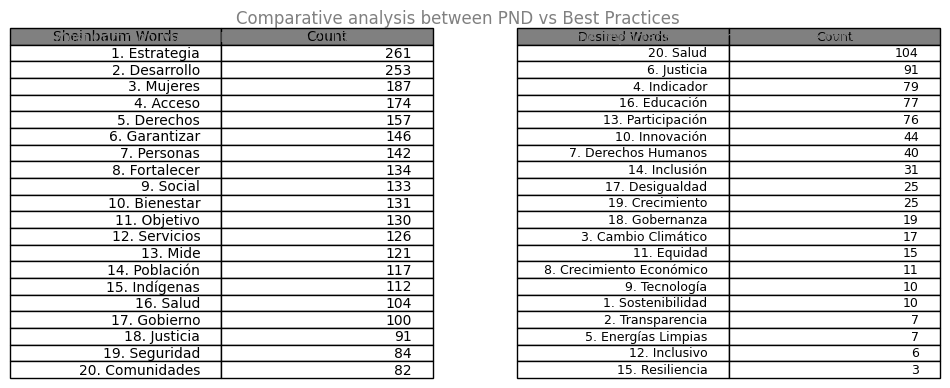

In [13]:

# Create figures and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Show DataFrames in subplots
ax1.table(cellText=df_most_commun.values, colLabels=df_most_commun.columns, colColours=['gray', 'gray'], loc='center', fontsize=11)
ax2.table(cellText=df_desire.values, colLabels=df_desire.columns, colColours=['gray', 'gray'], loc='center', fontsize=11)



# Hide subplot axes
ax1.axis('off')
ax2.axis('off')

# Set title using suptitle (centered by default)
plt.suptitle('Comparative analysis between PND vs Best Practices ', fontsize=12, color='gray')

# Agregar el título
ax1.set_title('Most Common words: NDP in México 2019-2024', color='gray', fontsize=10)
ax2.set_title('Some important words that should be considered', color='gray', fontsize=10)



# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.2)

plt.show()

In [14]:
#save in csv and change columns name
# changes columns name from de AMLO dataframe    
df_most_commun = df_most_commun.rename(columns={
    'Sheinbaum Words': 'SheWords',
    'Count': 'Count'
})

# changes columns name from the best practices dataframe
df_desire = df_desire.rename(columns={
    'Desired Words': 'DesiredWords',
    'Count': 'Count'
})
#save in csv
df_most_commun.to_csv('results/words_top_SHE.csv', index=False)
df_desire.to_csv('results/words_desired.csv', index=False)